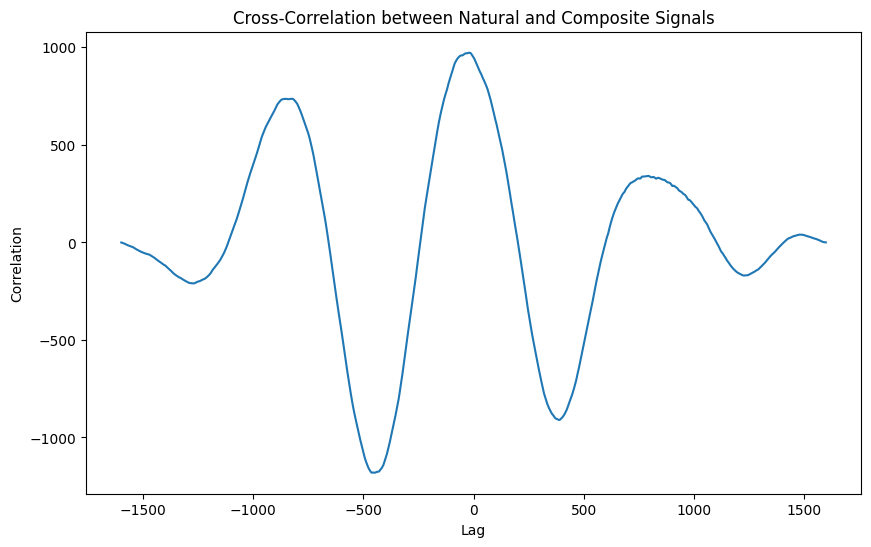

/home/aditya_tilak/dataset/venv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1600
  warnings.warn(


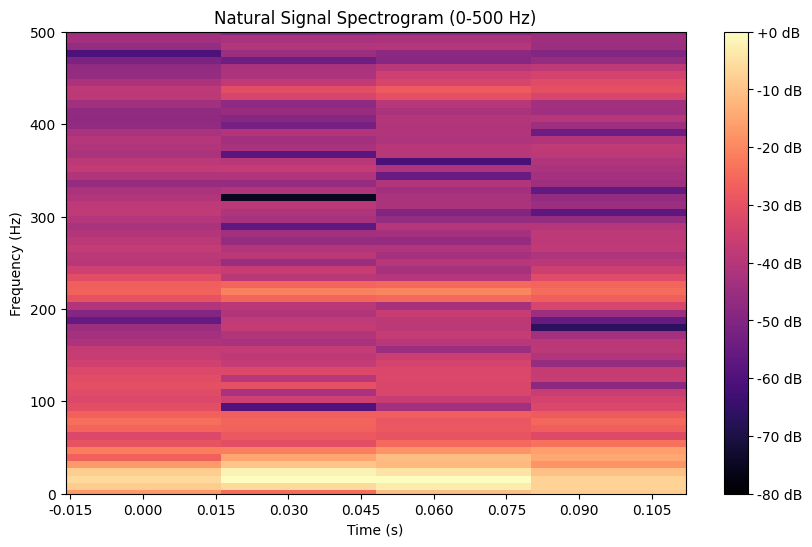

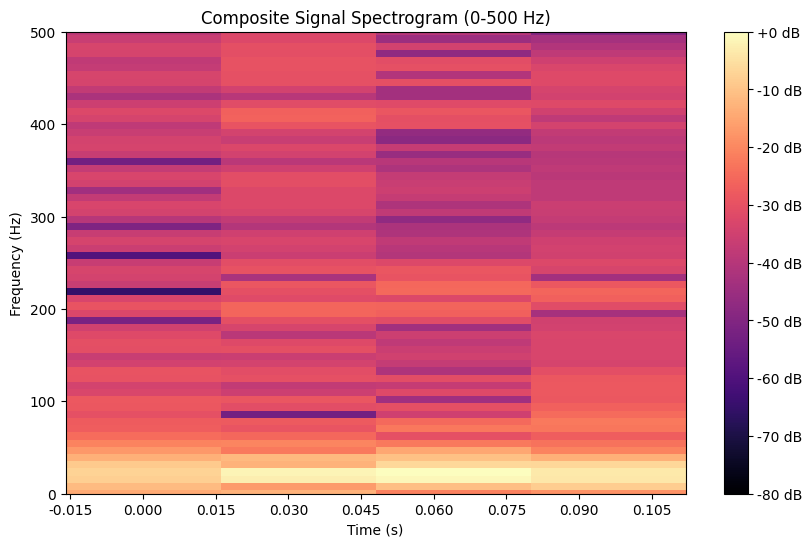

Signal-to-Interference Ratio (SIR): -46.50 dB
Structural Similarity Index (SSIM): 0.4318
Signal-to-Noise Ratio (SNR): -46.48 dB


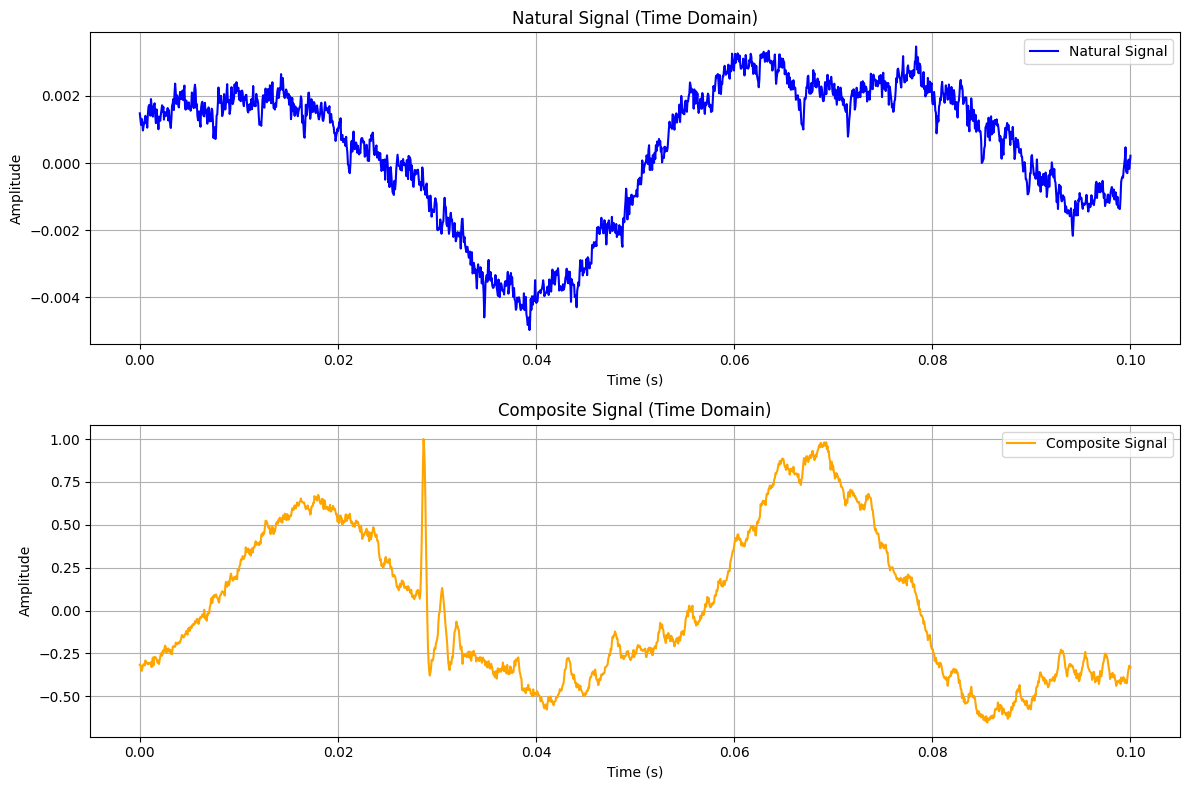

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.signal import correlate
from skimage.metrics import structural_similarity as ssim
import os

# Load the .wav files (natural signal and composite signal)
folder_path = r'/mnt/external-disk/InsectSound1000'
insect_name = 'Bradysia_'
audio_data_dict = {}

# Load audio files
wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav') and insect_name in f]
for wav_file in wav_files:
    file_path = os.path.join(folder_path, wav_file)
    try:
        audio_data, sample_rate = librosa.load(file_path, sr=None)
        audio_data_dict[wav_file] = {'audio': audio_data, 'sample_rate': sample_rate}
    except Exception as e:
        print(f"Error loading {wav_file}: {e}")
        
random_wav_file = wav_files[1000]
natural_signal = audio_data_dict[random_wav_file]['audio']

composite_signal, sr_composite = librosa.load('Signals/Bradysia_composite_signal.wav', sr=None)

# Ensure both signals have the same sample rate
if sample_rate != sr_composite:
    raise ValueError("Sample rates do not match between the two signals.")

min_length = min(len(natural_signal), len(composite_signal))
natural_signal = natural_signal[:min_length]
composite_signal = composite_signal[:min_length]

# 1. Cross-Correlation to measure overlap
def cross_correlation(signal1, signal2):
    # Normalize the signals
    signal1 = (signal1 - np.mean(signal1)) / np.std(signal1)
    signal2 = (signal2 - np.mean(signal2)) / np.std(signal2)
    # Calculate cross-correlation
    corr = correlate(signal1, signal2, mode='full')
    return corr

cross_corr = cross_correlation(natural_signal, composite_signal)
lags = np.arange(-len(natural_signal) + 1, len(natural_signal))

# Plot the cross-correlation
plt.figure(figsize=(10, 6))
plt.plot(lags, cross_corr)
plt.title('Cross-Correlation between Natural and Composite Signals')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

# 2. Spectrogram Comparison
def plot_spectrogram(signal, sr, title, max_freq=500):
    plt.figure(figsize=(10, 6))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
    librosa.display.specshow(D, x_axis='time', y_axis='linear', sr=sr)
    plt.ylim(0, max_freq)  # Limit the frequency axis to 0 to max_freq Hz
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

# Plot spectrograms with frequency capped at 500 Hz
plot_spectrogram(natural_signal, sample_rate, 'Natural Signal Spectrogram (0-500 Hz)', max_freq=500)
plot_spectrogram(composite_signal, sr_composite, 'Composite Signal Spectrogram (0-500 Hz)', max_freq=500)


# 3. Signal-to-Interference Ratio (SIR)
def signal_to_interference_ratio(natural, composite):
    # Calculate the energy of the natural signal
    natural_energy = np.sum(natural ** 2)
    # Calculate the energy of the composite signal
    interference_energy = np.sum(composite ** 2)
    # Calculate SIR (ratio of signal to interference energy)
    sir = 10 * np.log10(natural_energy / interference_energy)
    return sir

sir_value = signal_to_interference_ratio(natural_signal, composite_signal)
print(f'Signal-to-Interference Ratio (SIR): {sir_value:.2f} dB')

# 4. SSIM (Structural Similarity Index)
def calculate_ssim(signal1, signal2):
    # Rescale signals to the range [0, 255] for SSIM
    signal1_rescaled = np.uint8((signal1 - np.min(signal1)) / (np.max(signal1) - np.min(signal1)) * 255)
    signal2_rescaled = np.uint8((signal2 - np.min(signal2)) / (np.max(signal2) - np.min(signal2)) * 255)
    
    # Calculate SSIM between the two signals
    return ssim(signal1_rescaled, signal2_rescaled)

ssim_value = calculate_ssim(natural_signal, composite_signal)
print(f'Structural Similarity Index (SSIM): {ssim_value:.4f}')

# Signal-to-Noise Ratio (SNR)
def calculate_snr(natural, composite):
    # Calculate the signal power
    signal_power = np.mean(natural ** 2)
    # Calculate the noise power (difference between signals)
    noise_power = np.mean((natural - composite) ** 2)
    # Calculate SNR
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

snr_value = calculate_snr(natural_signal, composite_signal)
print(f'Signal-to-Noise Ratio (SNR): {snr_value:.2f} dB')


# Time arrays for plotting
time_natural = np.linspace(0, len(natural_signal) / sample_rate, len(natural_signal))
time_composite = np.linspace(0, len(composite_signal) / sr_composite, len(composite_signal))

# Plot signals in the time domain
plt.figure(figsize=(12, 8))

# Natural signal
plt.subplot(2, 1, 1)
plt.plot(time_natural, natural_signal, label='Natural Signal', color='blue')
plt.title('Natural Signal (Time Domain)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

# Composite signal
plt.subplot(2, 1, 2)
plt.plot(time_composite, composite_signal, label='Composite Signal', color='orange')
plt.title('Composite Signal (Time Domain)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.signal import correlate
from skimage.metrics import structural_similarity as ssim
import os

# Load the .wav files (natural signals)
folder_path = r'/mnt/external-disk/InsectSound1000'
insect_name = 'Nezara_'
audio_data_dict = {}

# Load natural signal audio files
wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav') and insect_name in f]
for wav_file in wav_files:
    file_path = os.path.join(folder_path, wav_file)
    try:
        audio_data, sample_rate = librosa.load(file_path, sr=None)
        audio_data_dict[wav_file] = {'audio': audio_data, 'sample_rate': sample_rate}
    except Exception as e:
        print(f"Error loading {wav_file}: {e}")

# Load composite signal
composite_signal_path = 'Signals/Nezara_composite_signal.wav'
composite_signal, sr_composite = librosa.load(composite_signal_path, sr=None)

# Ensure the composite signal sample rate matches
if sample_rate != sr_composite:
    raise ValueError("Sample rates do not match between the natural signals and composite signal.")

# Initialize metrics
sir_values = []
ssim_values = []
snr_values = []
soi_values = []

# Function to calculate metrics
def signal_to_interference_ratio(natural, composite):
    natural_energy = np.sum(natural ** 2)
    interference_energy = np.sum(composite ** 2)
    sir = 10 * np.log10(natural_energy / interference_energy)
    return sir

def calculate_ssim(signal1, signal2):
    signal1_rescaled = np.uint8((signal1 - np.min(signal1)) / (np.max(signal1) - np.min(signal1)) * 255)
    signal2_rescaled = np.uint8((signal2 - np.min(signal2)) / (np.max(signal2) - np.min(signal2)) * 255)
    return ssim(signal1_rescaled, signal2_rescaled)

def calculate_snr(natural, composite):
    signal_power = np.mean(natural ** 2)
    noise_power = np.mean((natural - composite) ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

def calculate_soi(natural, composite):
    cross_correlation = correlate(natural, composite, mode='valid')
    max_correlation = np.max(np.abs(cross_correlation))
    soi = max_correlation / (np.linalg.norm(natural) * np.linalg.norm(composite))
    return soi

# Process each natural signal
for wav_file, data in audio_data_dict.items():
    natural_signal = data['audio']

    # Trim signals to the same length
    min_length = min(len(natural_signal), len(composite_signal))
    natural_signal = natural_signal[:min_length]
    composite_signal_trimmed = composite_signal[:min_length]

    # Calculate metrics
    sir = signal_to_interference_ratio(natural_signal, composite_signal_trimmed)
    sir_values.append(sir)

    ssim_value = calculate_ssim(natural_signal, composite_signal_trimmed)
    ssim_values.append(ssim_value)

    snr = calculate_snr(natural_signal, composite_signal_trimmed)
    snr_values.append(snr)

    soi = calculate_soi(natural_signal, composite_signal_trimmed)
    soi_values.append(soi)

# Calculate mean metrics
mean_sir = np.mean(sir_values)
mean_ssim = np.mean(ssim_values)
mean_snr = np.mean(snr_values)
mean_soi = np.mean(soi_values)

print(f"Mean Signal-to-Interference Ratio (SIR): {mean_sir:.2f} dB")
print(f"Mean Structural Similarity Index (SSIM): {mean_ssim:.4f}")
print(f"Mean Signal-to-Noise Ratio (SNR): {mean_snr:.2f} dB")
print(f"Mean Signal Overlap Index (SOI): {mean_soi:.4f}")

# Plot metrics distribution
plt.figure(figsize=(16, 8))

# SIR distribution
plt.subplot(2, 2, 1)
plt.hist(sir_values, bins=20, color='blue', alpha=0.7)
plt.title('SIR Distribution')
plt.xlabel('SIR (dB)')
plt.ylabel('Frequency')

# SSIM distribution
plt.subplot(2, 2, 2)
plt.hist(ssim_values, bins=20, color='orange', alpha=0.7)
plt.title('SSIM Distribution')
plt.xlabel('SSIM')
plt.ylabel('Frequency')

# SNR distribution
plt.subplot(2, 2, 3)
plt.hist(snr_values, bins=20, color='green', alpha=0.7)
plt.title('SNR Distribution')
plt.xlabel('SNR (dB)')
plt.ylabel('Frequency')

# SOI distribution
plt.subplot(2, 2, 4)
plt.hist(soi_values, bins=20, color='purple', alpha=0.7)
plt.title('SOI Distribution')
plt.xlabel('SOI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Mean Signal-to-Interference Ratio (SIR): -46.97 dB
Mean Structural Similarity Index (SSIM): 0.3215
Mean Signal-to-Noise Ratio (SNR): -46.97 dB
Mean Signal Overlap Index (SOI): 0.2339


         Insect   SNR (dB)      SSIM       SOI
0      Bradysia -47.781292  0.346932  0.285014
1    Coccinella -41.616989  0.380796  0.209173
2    Episyrphus -39.850132  0.265091  0.191773
3   Halyomorpha -46.444538  0.200784  0.241063
4         Myzus -43.238125  0.327643  0.235808
5        Nezara -46.985886  0.320187  0.240480
6      Palomena -44.777126  0.319594  0.226488
7  Rhaphigaster -46.691860  0.417698  0.290953
8  Trialeurodes -45.381432  0.164257  0.274015
9          Tuta -46.030571  0.430089  0.297144


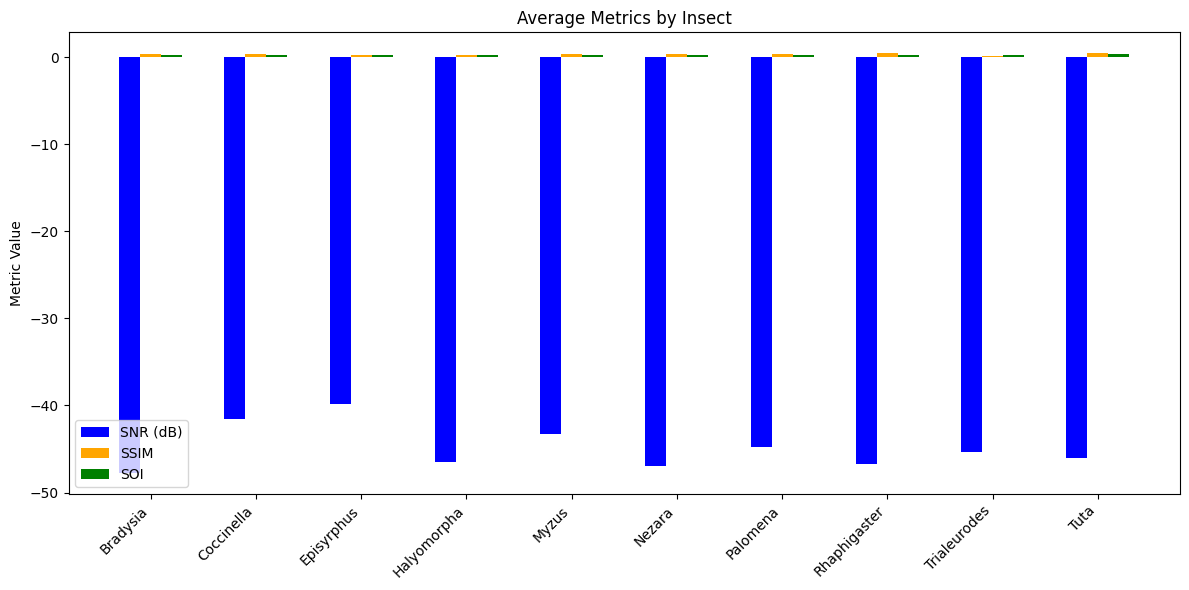

In [6]:
import os
import numpy as np
import pandas as pd
import librosa
from skimage.metrics import structural_similarity as ssim
from scipy.signal import correlate
import matplotlib.pyplot as plt
import random

# Paths
folder_path = r'/mnt/external-disk/InsectSound1000'
composite_signal_folder = r'Signals'

# Known insect names
insect_names = [
    "Myzus", "bombus", "Coccinella", "Nezara",
    "Aphidolotes", "Bradysia", "Episyrphus", "Palomena",
    "Trialeurodes", "Rhaphigaster", "Halyomorpha", "Tuta"
]

# Number of random files to process per insect
num_files_per_insect = 500  # Adjust as needed for speed and consistency

# Functions
def signal_to_interference_ratio(natural, composite):
    natural_energy = np.sum(natural ** 2)
    interference_energy = np.sum(composite ** 2)
    return 10 * np.log10(natural_energy / interference_energy)

def calculate_ssim(signal1, signal2):
    signal1_rescaled = np.uint8((signal1 - np.min(signal1)) / (np.max(signal1) - np.min(signal1)) * 255)
    signal2_rescaled = np.uint8((signal2 - np.min(signal2)) / (np.max(signal2) - np.min(signal2)) * 255)
    return ssim(signal1_rescaled, signal2_rescaled)

def calculate_snr(natural, composite):
    signal_power = np.mean(natural ** 2)
    noise_power = np.mean((natural - composite) ** 2)
    return 10 * np.log10(signal_power / noise_power)

def calculate_soi(natural, composite):
    cross_correlation = correlate(natural, composite, mode='valid')
    max_correlation = np.max(np.abs(cross_correlation))
    return max_correlation / (np.linalg.norm(natural) * np.linalg.norm(composite))

# Aggregating metrics
metrics = []

# List all files
wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]
composite_files = {f.split('_')[0]: f for f in os.listdir(composite_signal_folder) if f.endswith('.wav')}

# Process each insect
for insect_name in insect_names:
    insect_files = [f for f in wav_files if insect_name in f]

    # Randomly sample files
    sampled_files = random.sample(insect_files, min(num_files_per_insect, len(insect_files)))

    for wav_file in sampled_files:
        # Load the natural signal
        file_path = os.path.join(folder_path, wav_file)
        try:
            natural_signal, sr_natural = librosa.load(file_path, sr=None)

            # Load the corresponding composite signal
            if insect_name not in composite_files:
                print(f"No composite signal found for {insect_name}, skipping.")
                continue
            composite_path = os.path.join(composite_signal_folder, composite_files[insect_name])
            composite_signal, sr_composite = librosa.load(composite_path, sr=None)

            # Ensure the signals have the same sample rate
            if sr_natural != sr_composite:
                raise ValueError(f"Sample rates do not match for {insect_name}: {sr_natural} vs {sr_composite}")

            # Trim signals to the same length
            min_length = min(len(natural_signal), len(composite_signal))
            natural_signal = natural_signal[:min_length]
            composite_signal = composite_signal[:min_length]

            # Compute metrics
            snr = calculate_snr(natural_signal, composite_signal)
            ssim_value = calculate_ssim(natural_signal, composite_signal)
            soi = calculate_soi(natural_signal, composite_signal)

            # Store results
            metrics.append({
                "Insect": insect_name,
                "SNR (dB)": snr,
                "SSIM": ssim_value,
                "SOI": soi
            })

        except Exception as e:
            print(f"Error processing {wav_file}: {e}")

# Create a DataFrame for aggregated metrics
metrics_df = pd.DataFrame(metrics)

# Compute average metrics per insect
avg_metrics_df = metrics_df.groupby("Insect").mean().reset_index()

# Save results to CSV
avg_metrics_df.to_csv("insect_metrics_summary.csv", index=False)

# Display summary table
print(avg_metrics_df)

# Plot summary chart
plt.figure(figsize=(12, 6))
x = np.arange(len(avg_metrics_df))

# Plot bars for SNR, SSIM, and SOI
plt.bar(x - 0.2, avg_metrics_df["SNR (dB)"], width=0.2, label="SNR (dB)", color="blue")
plt.bar(x, avg_metrics_df["SSIM"], width=0.2, label="SSIM", color="orange")
plt.bar(x + 0.2, avg_metrics_df["SOI"], width=0.2, label="SOI", color="green")

# Add labels and legend
plt.xticks(x, avg_metrics_df["Insect"], rotation=45, ha="right")
plt.title("Average Metrics by Insect")
plt.ylabel("Metric Value")
plt.legend()
plt.tight_layout()
plt.show()


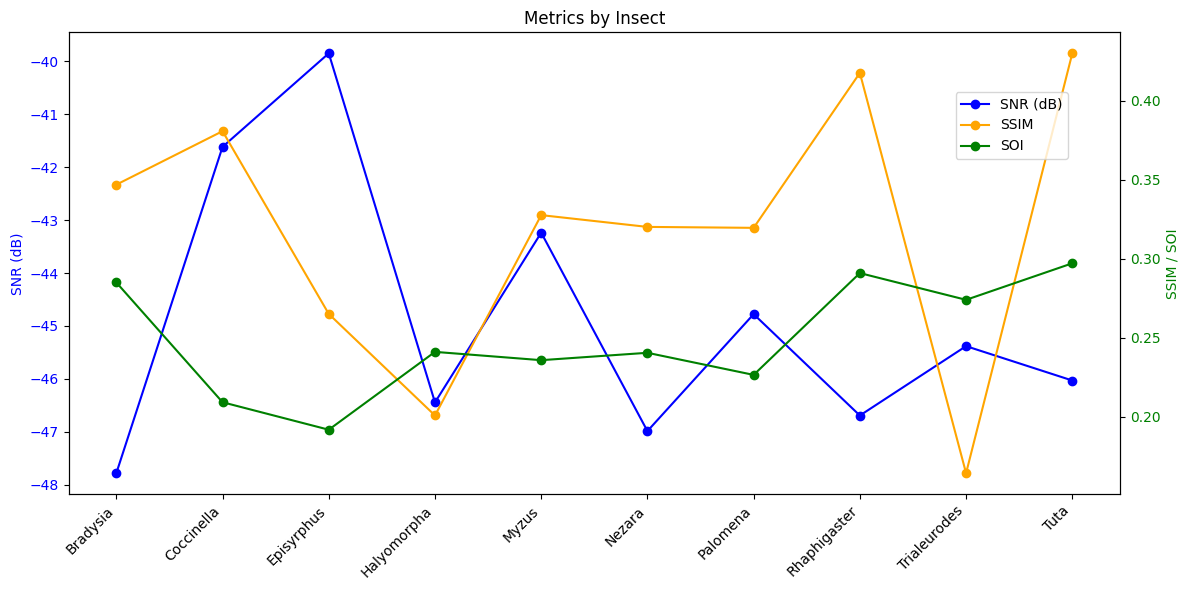

In [7]:
# Plot metrics with multiple y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# X-axis: Insects
x = np.arange(len(avg_metrics_df))
ax1.set_xticks(x)
ax1.set_xticklabels(avg_metrics_df["Insect"], rotation=45, ha="right")

# Plot SNR on the primary y-axis
ax1.plot(x, avg_metrics_df["SNR (dB)"], label="SNR (dB)", color="blue", marker='o')
ax1.set_ylabel("SNR (dB)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a secondary y-axis for SSIM and SOI
ax2 = ax1.twinx()
ax2.plot(x, avg_metrics_df["SSIM"], label="SSIM", color="orange", marker='o')
ax2.plot(x, avg_metrics_df["SOI"], label="SOI", color="green", marker='o')
ax2.set_ylabel("SSIM / SOI", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Title and legend
plt.title("Metrics by Insect")
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.85))
plt.show()
